# Extraindo as Letras da Discografia da Jesy Nelson

Jessica Louise Nelson (Romford, 14 de junho de 1991) é uma cantora, compositora e atriz britânica. Ela é mais conhecida por ter feito parte do Little Mix, grupo ao qual permaneceu de 2011 à 2020. Nelson deu início à carreira após ganhar a oitava temporada do talent show The X Factor UK no canal de televisão ITV. Com o grupo a cantora venceu três Brit Awards, com o primeiro sendo Melhor Música Britânica em 2017, Melhor Vídeo Britânico com Woman Like Me em 2018, prêmio de Melhor Grupo Britânico em 2021 - fazendo história na premiação tornando-se o primeiro grupo feminino a conseguir tal feito em mais de 43 anos da cerimônia.

A cantora em junto do grupo conseguiu uma fortuna de aproximadamente £66,7 milhões de libras esterlinas e ficaram na lista entre as maiores celebridades mais bem pagas de seu país e segundo a revista inglesa Debrette elas se tornaram uma das personalidades de maior influência no Reino Unido.

Em 2019, Nelson apresentou um documentário da BBC Three baseado em suas experiências com imagem corporal e bullying online intitulado Jesy Nelson: Odd One Out. Em seu documentário, ela também falou sobre o impacto que os cyber bullies tiveram em sua vida e saúde mental depois que ela alcançou a fama com a banda pop Little Mix. O documentário quebrou vários recordes, tornando-se o título não-factual mais importante da BBC Three desde que o canal mudou para online e na BBC One foi assistido por 3,3 milhões de telespectadores. O documentário o também ganhou o prêmio Factual Entertainment no National Television Awards.

Mais informações no link: https://pt.wikipedia.org/wiki/Jesy_Nelson

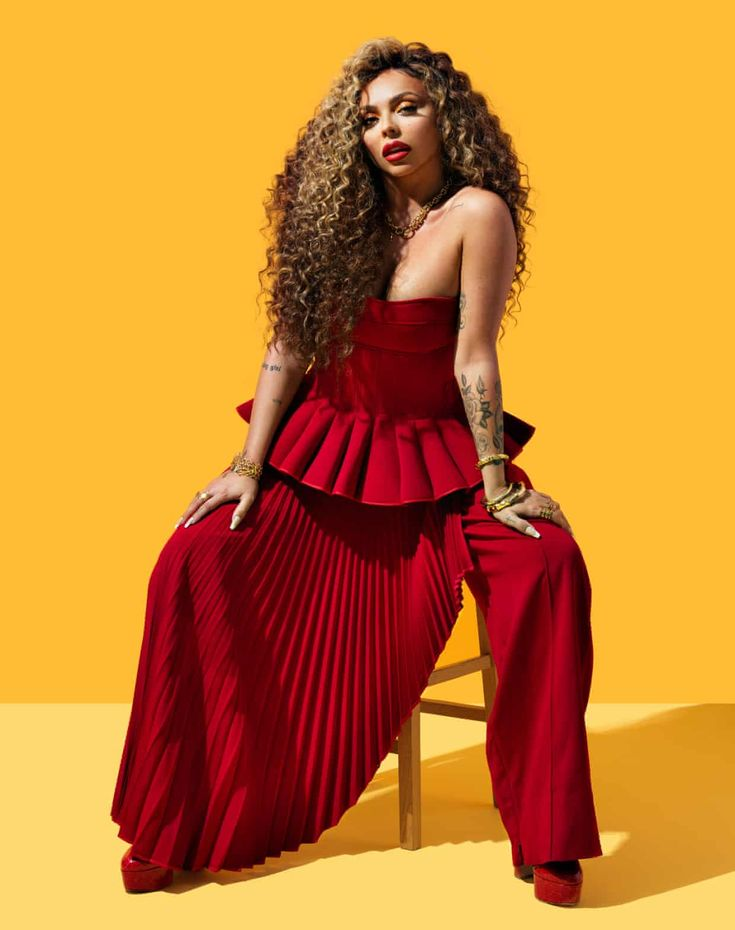

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

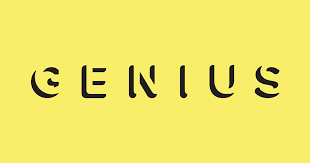

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "rkmYPIURaV9uyAXm8OhBNkDG_bGgeYFP_UDFfasHS0b_sxPWz2PrBJR8Rmcdzhhr"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Jesy Nelson", max_songs=2)

Searching for songs by Jesy Nelson...

Song 1: "Boyz"
Song 2: "Bad Thing"

Reached user-specified song limit (2).
Done. Found 2 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_JesyNelson.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_JesyNelson.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,release_year
0,Boyz,"[Intro: Nicki Minaj]\nAyo, it's the UK baddie ...",2021-10-08,2021
1,Bad Thing,"[Verse 1]\nHey, we started at the end\nAnother...",2023-04-14,2023


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("JesyNelsonLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('JesyNelson.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Boyz',
  ' nicki minaj baddie barbie  jesy nelson love little bitter sweet recipe bein nice little borin sheets when ride know know please refrain jesy nelson like tattoos gold teeth type make feel like baddie like fire bringin baby somethin bout weak knees  jesy nelson hold criminal mama want enough know  jesy nelson like know like like stop love boys life like know like like stop love boys life  jesy nelson little attitude think kinda cute hood good damn taboo know know please like baby sashimi refrain jesy nelson like tattoos gold teeth type make feel like baddie like fire bringin baby somethin bout weak knees  jesy nelson hold criminal mama want enough know  jesy nelson like know like like stop love boys life like know like like stop love boys life  nicki minaj proceed give need bitches want come word biggie diddy mase woah like find prettier face keep dancing like total could shine shoot place prrr raspberries cherries berries edible bitches like library done read body smokin c